**Import Libs & Dataset**

In [448]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv",delimiter=";")
data = df.copy()

**Display 3 first lines**

In [449]:
data.head(3)

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
0,62.84998,male,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,...,7.459961,NaN,NaN,NaN,7.0,7.0,7.0,0,0,NaN
1,60.33899,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,...,7.250000,NaN,NaN,NaN,NaN,1.0,1.0,1,1,<2 mo. follow-up
2,52.74698,female,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,...,7.459961,NaN,NaN,NaN,1.0,0.0,0.0,1,0,<2 mo. follow-up


**Display 3 last lines**

In [450]:
data.tail(3)

,age,sex,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,...,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead,sfdm2
9102,70.38196,male,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,46564.0,31409.0156,...,7.379883,189.0,60.0,3900.0,NaN,NaN,2.525391,0,0,NaN
9103,47.01999,male,MOSF w/Malig,ARF/MOSF,1,13.0,NaN,0.0,58439.0,NaN,...,7.469727,246.0,55.0,NaN,NaN,0.0,0.000000,1,1,<2 mo. follow-up
9104,81.53894,female,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,$11-$25k,0.0,15604.0,10605.7578,...,7.289062,187.0,15.0,NaN,0.0,NaN,0.494751,1,0,no(M2 and SIP pres)


**Display data summary**

In [451]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   dzgroup   9105 non-null   object 
 3   dzclass   9105 non-null   object 
 4   num.co    9105 non-null   int64  
 5   edu       7471 non-null   float64
 6   income    6123 non-null   object 
 7   scoma     9104 non-null   float64
 8   charges   8933 non-null   float64
 9   totcst    8217 non-null   float64
 10  totmcst   5630 non-null   float64
 11  avtisst   9023 non-null   float64
 12  race      9063 non-null   object 
 13  sps       9104 non-null   float64
 14  aps       9104 non-null   float64
 15  surv2m    9104 non-null   float64
 16  surv6m    9104 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  ca        9105 non-null   obje

,age,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,...,sod,ph,glucose,bun,urine,adlp,adls,adlsc,death,hospdead
count,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,...,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000,9105.000000,9105.000000
mean,62.650823,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,...,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272,0.681054,0.259198
std,15.593710,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,...,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763,0.466094,0.438219
min,18.041990,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,...,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,...,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.856990,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,...,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,73.998960,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,...,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000,1.000000,1.000000
max,101.847960,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,...,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242,1.000000,1.000000


**Visualize missing values**

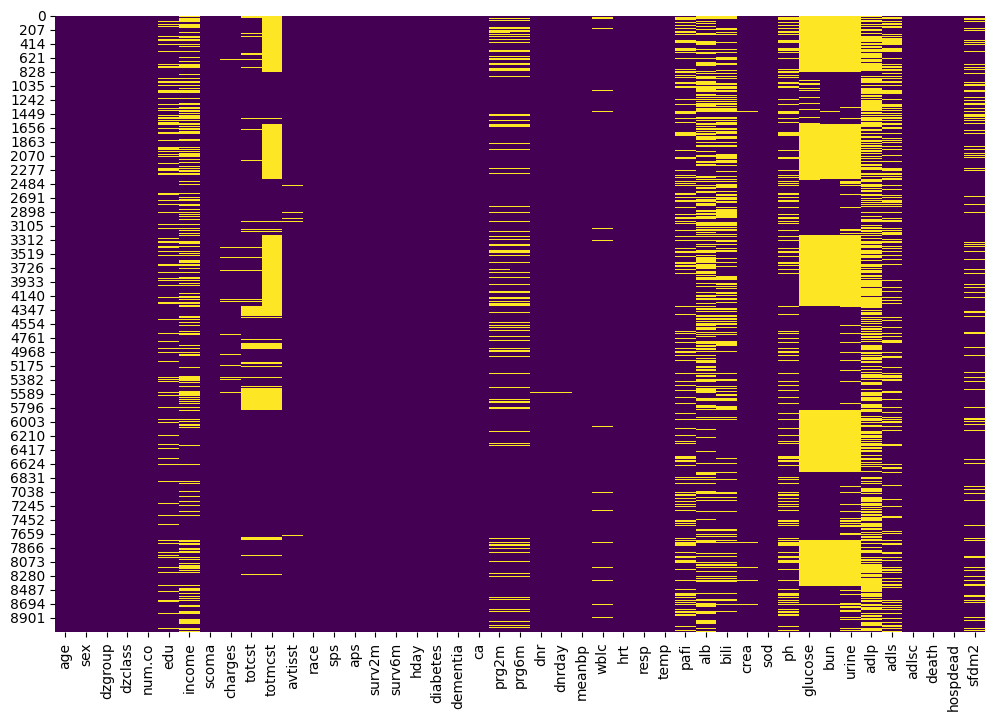


 

age            0
sex            0
dzgroup        0
dzclass        0
num.co         0
edu         1634
income      2982
scoma          1
charges      172
totcst       888
totmcst     3475
avtisst       82
race          42
sps            1
aps            1
surv2m         1
surv6m         1
hday           0
diabetes       0
dementia       0
ca             0
prg2m       1649
prg6m       1633
dnr           30
dnrday        30
meanbp         1
wblc         212
hrt            1
resp           1
temp           1
pafi        2325
alb         3372
bili        2601
crea          67
sod            1
ph          2284
glucose     4500
bun         4352
urine       4862
adlp        5641
adls        2867
adlsc          0
death          0
hospdead       0
sfdm2       1400
dtype: int64


In [452]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()
#Printing sum of missing Valuees
print("\n \n")
print(data.isnull().sum())

#Univariate Analysis
**Numerical Variables**

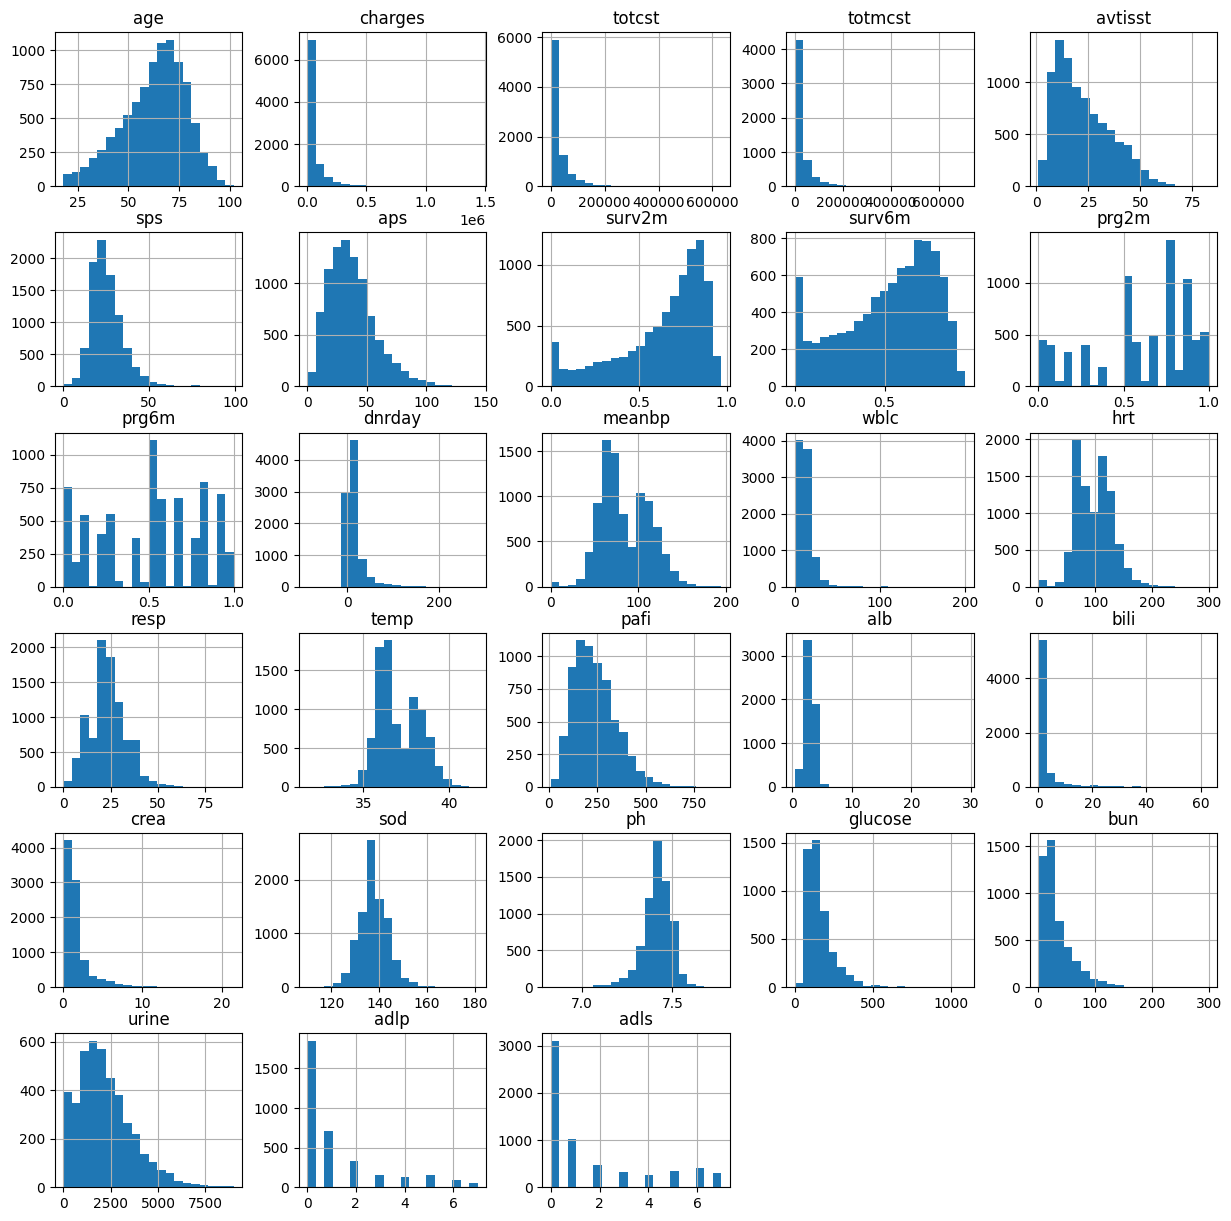

In [453]:
numerical_columns = ['age', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls']
data[numerical_columns].hist(figsize=(15, 15), bins=20)
plt.show()

**Categorical Variables**

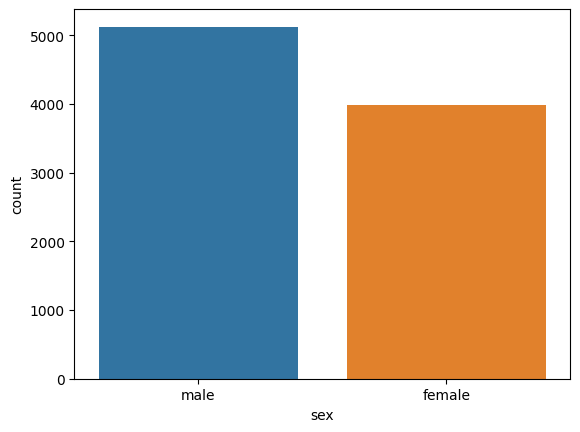

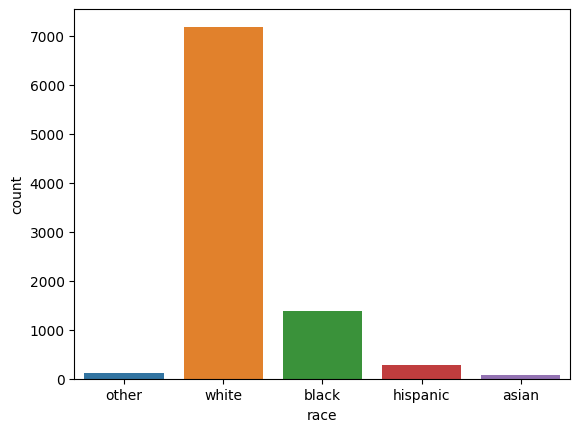

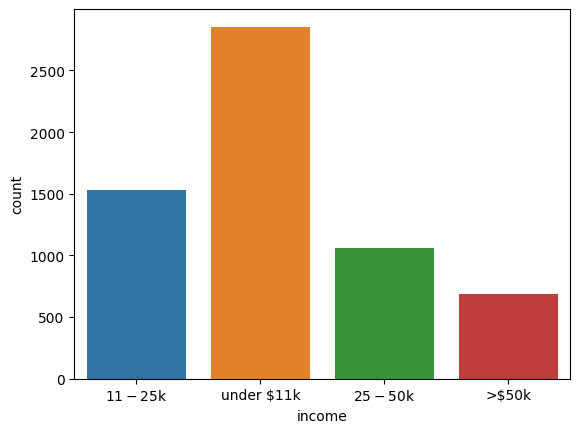

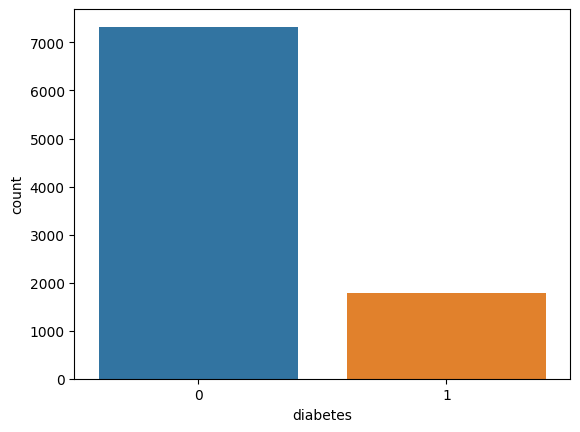

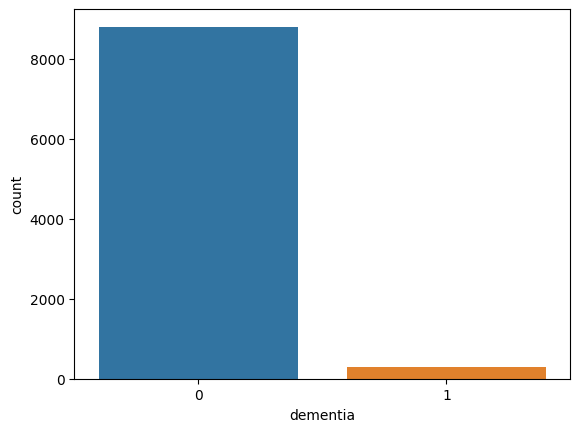

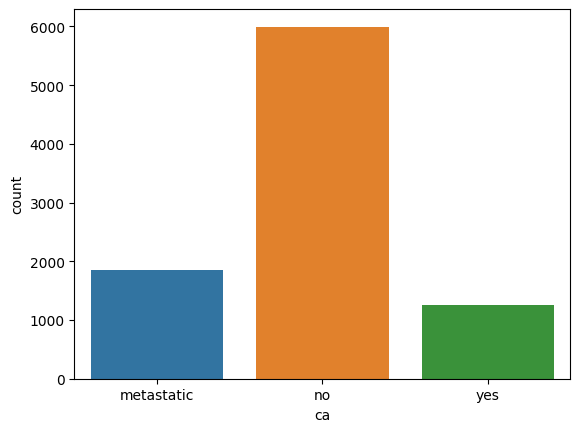

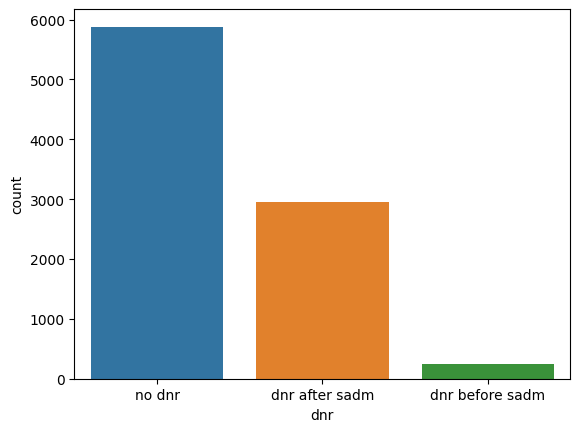

In [454]:
categorical_columns = ['sex', 'race', 'income', 'diabetes', 'dementia', 'ca', 'dnr']
for column in categorical_columns:
    sns.countplot(x=column, data=data)
    plt.show()


# Bivariate Analysis
**Example: Scatter plot for charges vs. totcst**

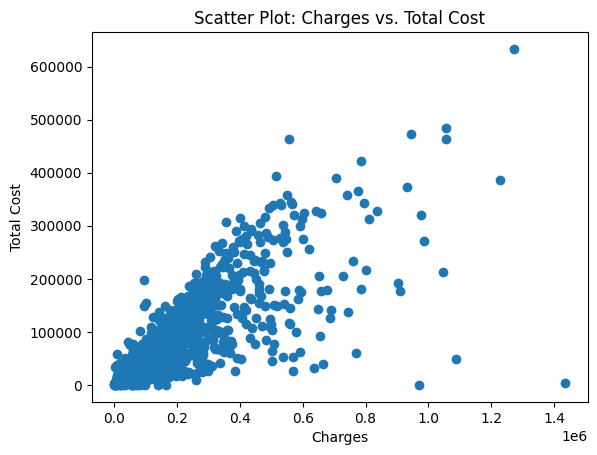

In [455]:
plt.scatter(data['charges'], data['totcst'])
plt.xlabel('Charges')
plt.ylabel('Total Cost')
plt.title('Scatter Plot: Charges vs. Total Cost')
plt.show()

# Multivariate Analysis
**Example: Heatmap for correlation matrix**

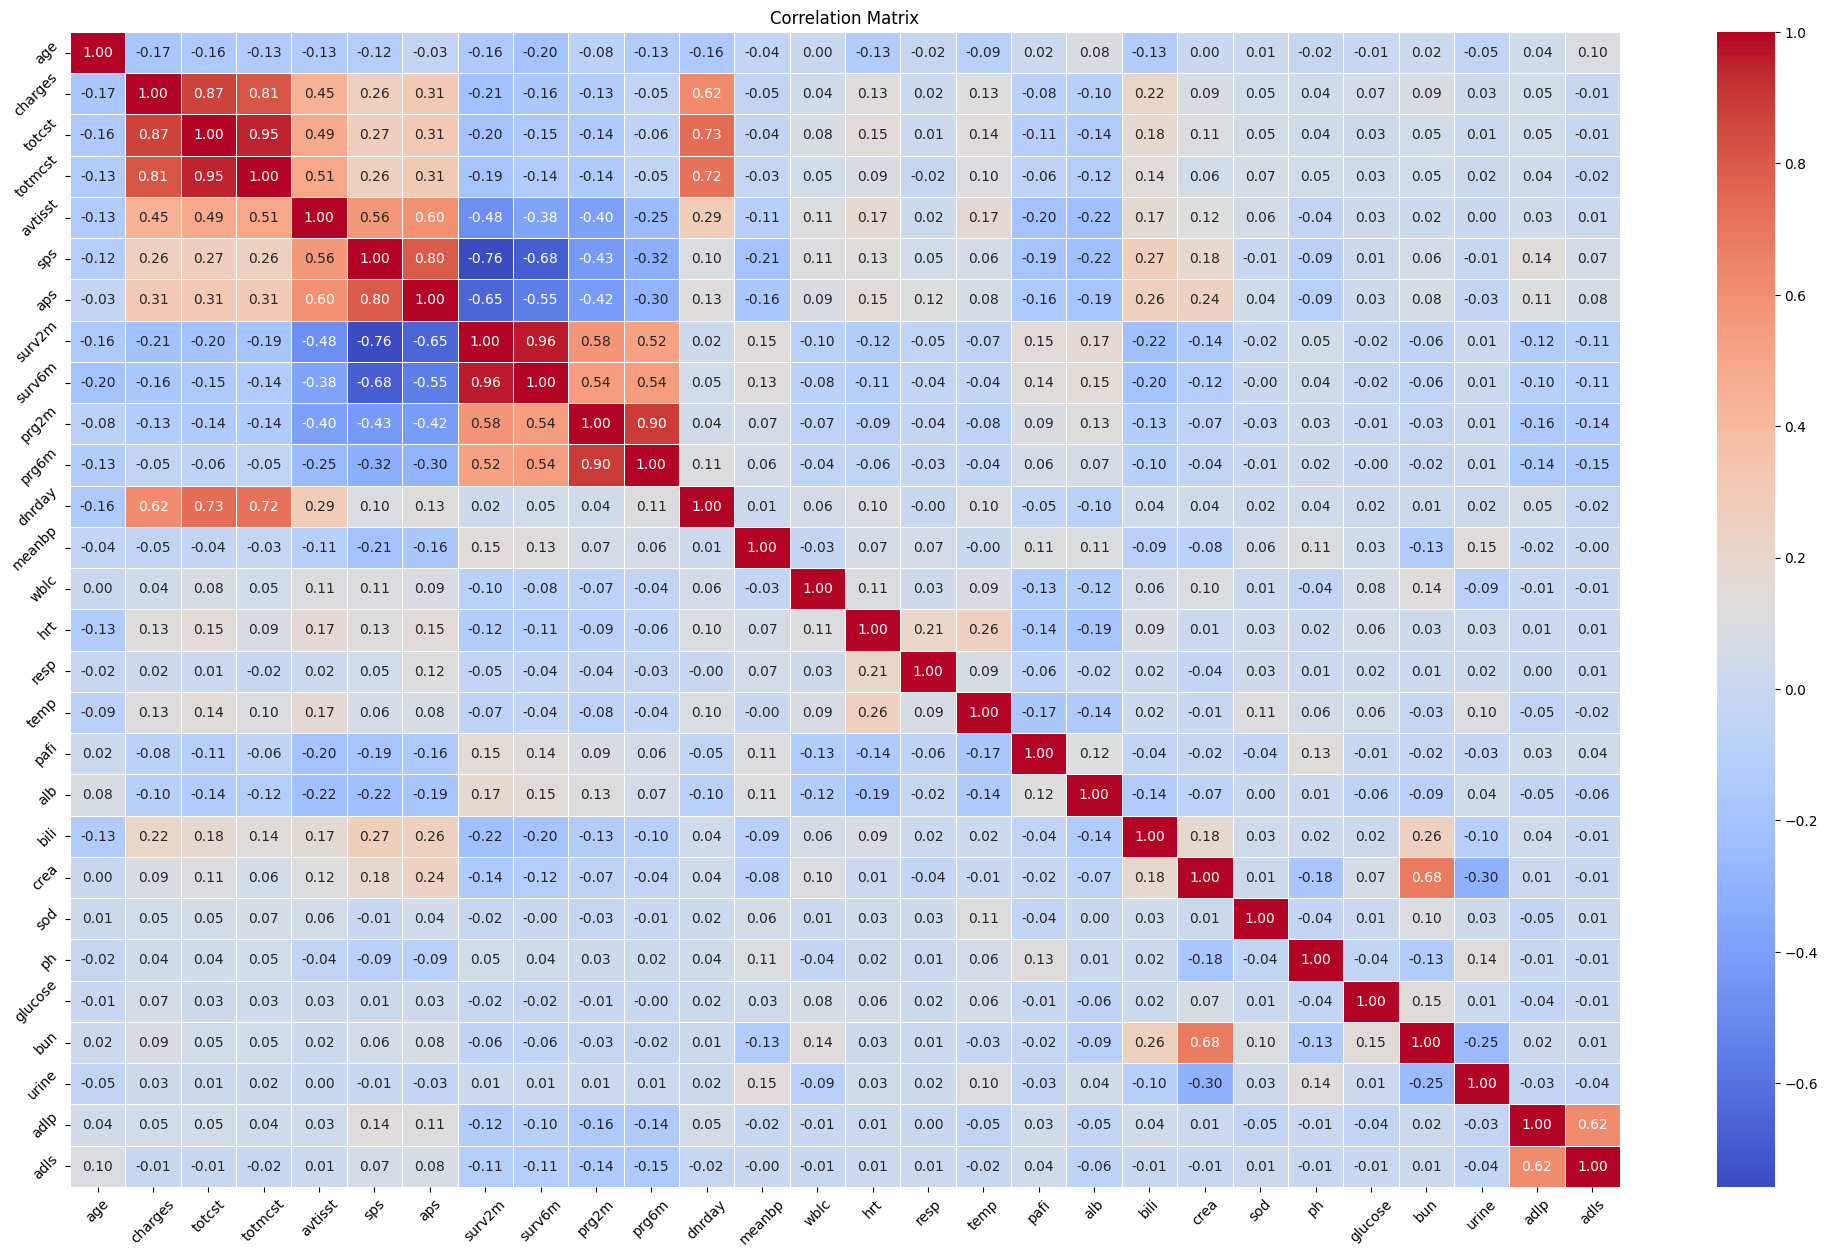

In [456]:
correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.title('Correlation Matrix')
plt.show()

#Missing Values
**Impute Numerical Columns**

In [457]:
numerical_columns = ['edu', 'charges', 'totcst', 'totmcst', 'avtisst', 'sps', 'aps', 'surv2m', 'surv6m', 'prg2m', 'prg6m', 'dnrday', 'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea', 'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls']
imputer = SimpleImputer(strategy='mean')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])
data.dropna(inplace=True)

**Impute Categorical Columns**

In [458]:
categorical_columns = ['edu', 'income', 'race']
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer_categorical.fit_transform(data[categorical_columns])
data.dropna(inplace=True)

# Feature Engineering

In [459]:
# This creates a new feature that represents the interaction between 'age' and 'meanbp'.
data['age_meanbp_interaction'] = data['age'] * data['meanbp']

In [460]:
# This introduces polynomial features up to the second degree for numerical columns.
poly = PolynomialFeatures(degree=2)
poly_features = poly.fit_transform(data[numerical_columns])

In [461]:
# This creates a new categorical feature 'age_category' by binning the 'age' column.
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-100']
data['age_category'] = pd.cut(data['age'], bins=bins, labels=labels)

In [462]:
# This applies a logarithmic transformation to the 'charges' column.
data['log_charges'] = np.log1p(data['charges'])

In [463]:
# This performs one-hot encoding for the 'race' column.
data = pd.get_dummies(data, columns=['race'], prefix='race')
data = pd.get_dummies(data, columns=['sex', 'income', 'diabetes', 'dementia', 'ca', 'dnr', 'age_category', 'dzgroup', 'dzclass', 'sfdm2'])

In [464]:
# This standardizes the numerical features using StandardScaler.
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [465]:
# This reduces the dimensionality of numerical features to two components using PCA.
pca = PCA(n_components=2)
pca_features = pca.fit_transform(data[numerical_columns])

In [466]:
# Importing models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#Data Splitting -- Prediction on the total hospital costs per patient.

In [467]:
# 'totcst' is the column you want to predict (total hospital costs)
X = data.drop('totcst', axis=1)
y = data['totcst']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Instantiate regression models**

In [468]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)
svr_reg = SVR()
knn_reg = KNeighborsRegressor()

**Train the models**

In [469]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)
gradient_boosting_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

**Make predictions on the testing set**

In [470]:
linear_reg_pred = linear_reg.predict(X_test)
decision_tree_reg_pred = decision_tree_reg.predict(X_test)
random_forest_reg_pred = random_forest_reg.predict(X_test)
gradient_boosting_reg_pred = gradient_boosting_reg.predict(X_test)
svr_reg_pred = svr_reg.predict(X_test)
knn_reg_pred = knn_reg.predict(X_test)

**Evaluation**

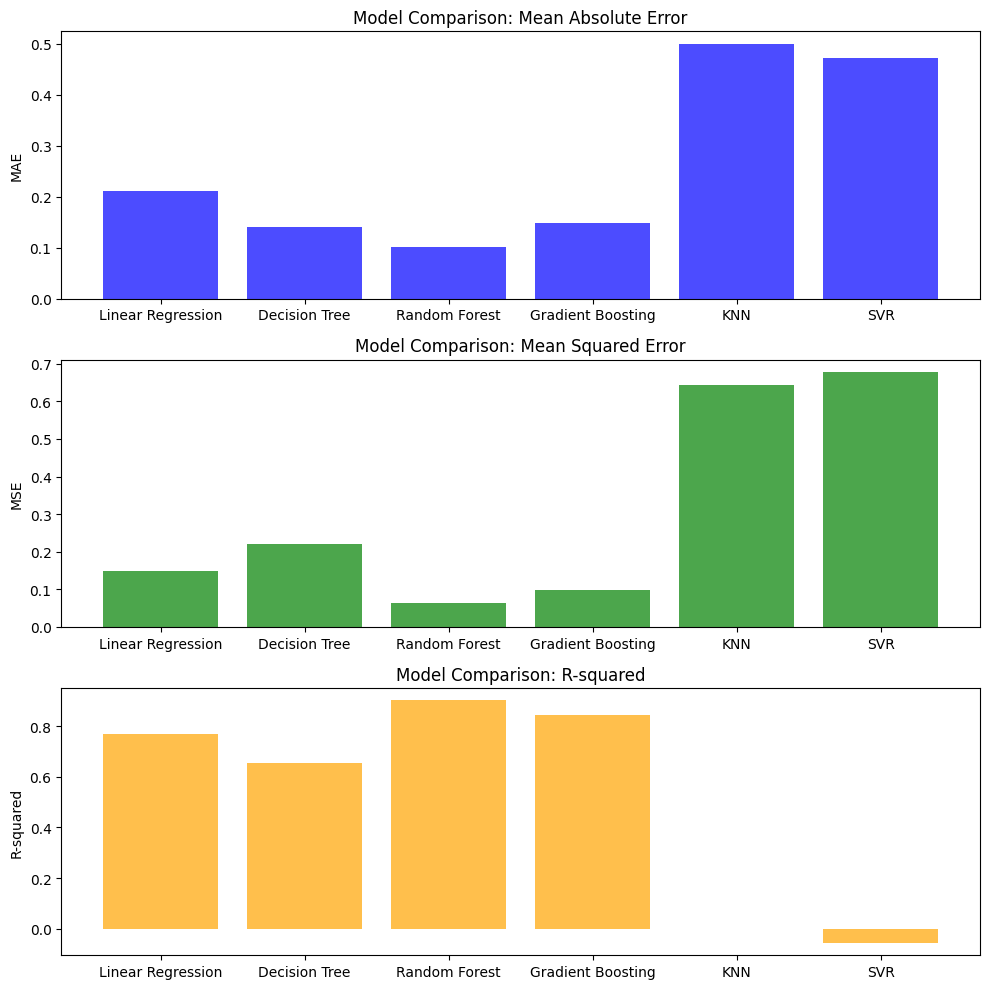

In [471]:
# Calculate MAE
mae_linear = mean_absolute_error(y_test, linear_reg_pred)
mae_decision_tree = mean_absolute_error(y_test, decision_tree_reg_pred)
mae_random_forest = mean_absolute_error(y_test, random_forest_reg_pred)
mae_gradient_boosting = mean_absolute_error(y_test, gradient_boosting_reg_pred)
mae_knn = mean_absolute_error(y_test, knn_reg_pred)
mae_svr = mean_absolute_error(y_test, svr_reg_pred)

# Calculate MSE
mse_linear = mean_squared_error(y_test, linear_reg_pred)
mse_decision_tree = mean_squared_error(y_test, decision_tree_reg_pred)
mse_random_forest = mean_squared_error(y_test, random_forest_reg_pred)
mse_gradient_boosting = mean_squared_error(y_test, gradient_boosting_reg_pred)
mse_knn = mean_squared_error(y_test, knn_reg_pred)
mse_svr = mean_squared_error(y_test, svr_reg_pred)

# Calculate R-squared
r2_linear = r2_score(y_test, linear_reg_pred)
r2_decision_tree = r2_score(y_test, decision_tree_reg_pred)
r2_random_forest = r2_score(y_test, random_forest_reg_pred)
r2_gradient_boosting = r2_score(y_test, gradient_boosting_reg_pred)
r2_knn = r2_score(y_test, knn_reg_pred)
r2_svr = r2_score(y_test, svr_reg_pred)

models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'SVR']
mae_values = [mae_linear, mae_decision_tree, mae_random_forest, mae_gradient_boosting, mae_knn, mae_svr]
mse_values = [mse_linear, mse_decision_tree, mse_random_forest, mse_gradient_boosting, mse_knn, mse_svr]
r2_values = [r2_linear, r2_decision_tree, r2_random_forest, r2_gradient_boosting, r2_knn, r2_svr]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

# MAE
axes[0].bar(models, mae_values, color='blue', alpha=0.7)
axes[0].set_ylabel('MAE')
axes[0].set_title('Model Comparison: Mean Absolute Error')

# MSE
axes[1].bar(models, mse_values, color='green', alpha=0.7)
axes[1].set_ylabel('MSE')
axes[1].set_title('Model Comparison: Mean Squared Error')

# R-squared
axes[2].bar(models, r2_values, color='orange', alpha=0.7)
axes[2].set_ylabel('R-squared')
axes[2].set_title('Model Comparison: R-squared')

plt.tight_layout()
plt.show()


#Data Splitting -- Prediction on the length of stay for the patients.

In [472]:
# # Assuming 'slos' is the column you want to predict (total hospital costs)
# X = data.drop('slos', axis=1)
# y = data['slos']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# ----------------
# Instantiate regression models

# linear_reg = LinearRegression()
# decision_tree_reg = DecisionTreeRegressor(random_state=42)
# random_forest_reg = RandomForestRegressor(random_state=42)
# gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Train the models

# linear_reg.fit(X_train, y_train)
# decision_tree_reg.fit(X_train, y_train)
# random_forest_reg.fit(X_train, y_train)
# gradient_boosting_reg.fit(X_train, y_train)

# Make predictions on the testing set

# linear_reg_pred = linear_reg.predict(X_test)
# decision_tree_reg_pred = decision_tree_reg.predict(X_test)
# random_forest_reg_pred = random_forest_reg.predict(X_test)
# gradient_boosting_reg_pred = gradient_boosting_reg.predict(X_test)

# Evaluation

# # Calculate MAE
# mae_linear = mean_absolute_error(y_test, linear_reg_pred)
# mae_decision_tree = mean_absolute_error(y_test, decision_tree_reg_pred)
# mae_random_forest = mean_absolute_error(y_test, random_forest_reg_pred)
# mae_gradient_boosting = mean_absolute_error(y_test, gradient_boosting_reg_pred)

# # Calculate MSE
# mse_linear = mean_squared_error(y_test, linear_reg_pred)
# mse_decision_tree = mean_squared_error(y_test, decision_tree_reg_pred)
# mse_random_forest = mean_squared_error(y_test, random_forest_reg_pred)
# mse_gradient_boosting = mean_squared_error(y_test, gradient_boosting_reg_pred)

# # Calculate R-squared
# r2_linear = r2_score(y_test, linear_reg_pred)
# r2_decision_tree = r2_score(y_test, decision_tree_reg_pred)
# r2_random_forest = r2_score(y_test, random_forest_reg_pred)
# r2_gradient_boosting = r2_score(y_test, gradient_boosting_reg_pred)

# models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting']
# mae_values = [mae_linear, mae_decision_tree, mae_random_forest, mae_gradient_boosting]
# mse_values = [mse_linear, mse_decision_tree, mse_random_forest, mse_gradient_boosting]
# r2_values = [r2_linear, r2_decision_tree, r2_random_forest, r2_gradient_boosting]

# # Plotting
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10))

# # MAE
# axes[0].bar(models, mae_values, color='blue', alpha=0.7)
# axes[0].set_ylabel('MAE')
# axes[0].set_title('Model Comparison: Mean Absolute Error')

# # MSE
# axes[1].bar(models, mse_values, color='green', alpha=0.7)
# axes[1].set_ylabel('MSE')
# axes[1].set_title('Model Comparison: Mean Squared Error')

# # R-squared
# axes[2].bar(models, r2_values, color='orange', alpha=0.7)
# axes[2].set_ylabel('R-squared')
# axes[2].set_title('Model Comparison: R-squared')

# plt.tight_layout()
# plt.show()
